___
# Logistic Regression with Python

 [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic).


# Imports

In [472]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [473]:
import cufflinks as cf
cf.go_offline()

In [474]:
import warnings
warnings.filterwarnings("ignore")

# Missing Data & Analysis

In [510]:
train1 = pd.read_csv('titanic_train.csv')
train2 = pd.read_csv('titanic_test.csv')
train = pd.concat([train1,train2])

In [476]:
train.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [477]:
train.isnull().head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False


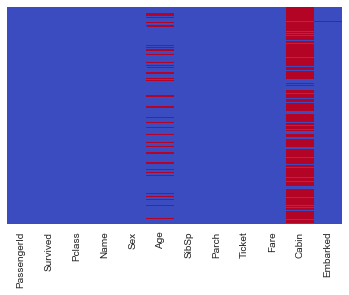

In [478]:
sns.heatmap(train1.isnull(),yticklabels = False, cbar = False, cmap = 'coolwarm')

We see that 'Age' can be replaced by factors of other columns but 'Cabin' has a lot of missing data to get results 

In [479]:
sns.set_style('whitegrid')

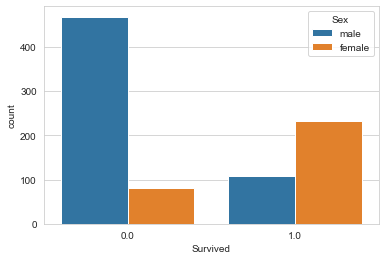

In [480]:
sns.countplot(x='Survived', hue = 'Sex',data = train)

We see that the male count for deceased is higher and female count for survived is higher

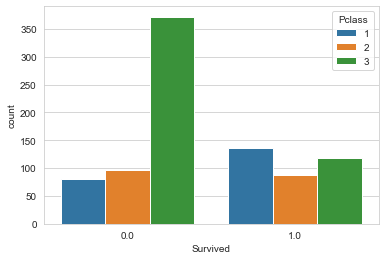

In [481]:
sns.countplot(x='Survived', hue = 'Pclass',data = train)

A lot of 3rd Pclass passengers did not survive

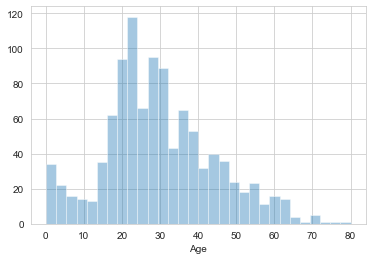

In [482]:
sns.distplot(train['Age'].dropna(),kde=False,bins = 30)

The average age was about 20 to 30 years old

In [483]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 172.9+ KB


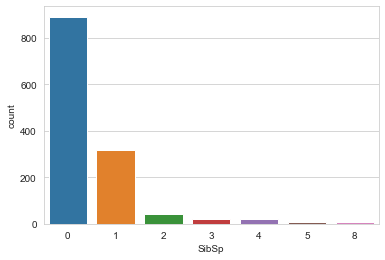

In [484]:
sns.countplot(x='SibSp',data = train)

Most passengers did not have sibling on board

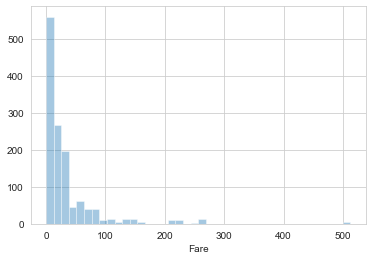

In [485]:
sns.distplot(train['Fare'],kde=False,bins = 40)

In [486]:
train['Fare'].iplot(kind = 'hist',bins=50)

# Data Cleaning

Using imputation to fill in average age instead of dropping rows

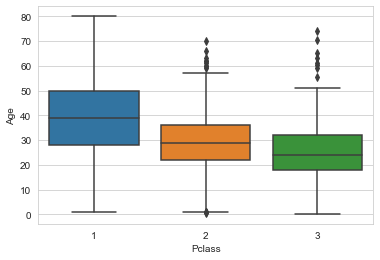

In [487]:
sns.boxplot(train['Pclass'],train['Age'])

We see that the average age increases for each class group.

In [488]:
train1=train[train['Pclass']==1]
train2=train[train['Pclass']==2]
train3=train[train['Pclass']==3]

In [489]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return train1['Age'].mean()
        elif Pclass == 2:
            return train2['Age'].mean()
        else:
            return train3['Age'].mean()
    else:
        return Age

In [490]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

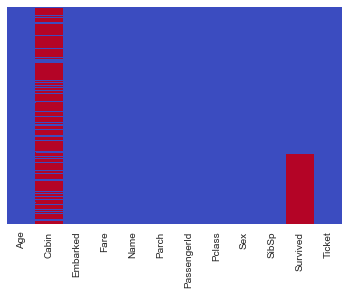

In [491]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

No more missing information for the 'Age'

In [492]:
train.drop('Cabin',axis = 1,inplace=True)

In [493]:
train.dropna(inplace = True)

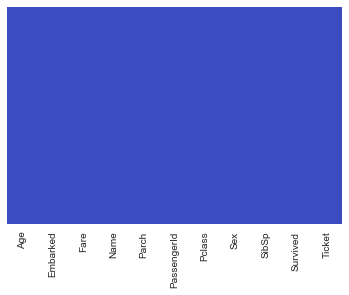

In [494]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [495]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [496]:
train = pd.concat([train,sex,embark], axis = 1)

In [497]:
train.drop(['Sex','Embarked','Name','Ticket','PassengerId'],axis=1,inplace=True)

Removing all the string data that we are not going to use

In [498]:
train.head()

,Age,Fare,Parch,Pclass,SibSp,Survived,male,Q,S
0,22.0,7.2500,0,3,1,0.0,1,0,1
1,38.0,71.2833,0,1,1,1.0,0,0,0
2,26.0,7.9250,0,3,0,1.0,0,0,1
3,35.0,53.1000,0,1,1,1.0,0,0,1
4,35.0,8.0500,0,3,0,0.0,1,0,1


# Logistic Regression Model

In [499]:
from sklearn.model_selection import train_test_split

In [500]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [501]:
from sklearn.linear_model import LogisticRegression

In [502]:
logmodel = LogisticRegression()

In [503]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [504]:
predictions = logmodel.predict(X_test)

In [505]:
from sklearn.metrics import classification_report

In [506]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.80      0.91      0.85       163
         1.0       0.82      0.65      0.73       104

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



In [507]:
from sklearn.metrics import confusion_matrix

In [508]:
confusion_matrix(y_test,predictions)

array([[148,  15],
       [ 36,  68]], dtype=int64)